In [1]:
import numpy as np

import tqdm

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from torch.utils.data import Dataset, DataLoader

import torch

In [40]:
ls shared/models

all_preds_labse_en_ru.npy  labels_roma.npy   preds_roma.npy
clf_nikita_weights.pth     preds_nikita.npy


In [2]:
labels1 = np.load('shared/models/labels_roma.npy')

In [3]:
labels = np.load('shared/models/labels_roma.npy')

preds1 = np.load('shared/models/preds_nikita.npy')
preds2 = np.load('shared/models/preds_roma.npy')
preds3 = np.load('shared/models/all_preds_labse_en_ru.npy')

In [47]:
12354//2

6177

In [4]:
labels_test, labels_val = labels[:12354//2], labels[12354//2:]
preds1_test, preds1_val = preds1[:12354//2], preds1[12354//2:]
preds2_test, preds2_val = preds2[:12354//2], preds2[12354//2:]
preds3_test, preds3_val = preds3[:12354//2], preds3[12354//2:]

In [60]:
f1_best = 0
best_x, best_y, best_z = 0, 0, 0

for x in tqdm.tqdm(np.arange(0.001, 2, 0.1)):
    for y in np.arange(0.001, 2, 0.1):
        for z in np.arange(0.001, 2, 0.1):
            final_preds = (x * preds1_test + y * preds2_test + z * preds3_test)/3
            
            f1_temp = f1_score(labels_test, np.argmax(final_preds, axis=1), average='weighted')
            if f1_temp > f1_best:
                best_x = x
                best_y = y
                best_z = z
                f1_best = f1_temp

100%|██████████| 20/20 [00:34<00:00,  1.75s/it]


In [61]:
f1_best, best_x, best_y, best_z

(0.9089412077452632, 1.001, 0.501, 1.601)

In [5]:
best_x, best_y, best_z = 1.001, 0.501, 1.601

In [58]:
final_preds_val = (best_x * preds1_val + best_y * preds2_val + best_z * preds3_val)/3
            
f1_temp = f1_score(labels_val, np.argmax(final_preds_val, axis=1), average='weighted')
f1_temp

0.9029865668275953

In [76]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.metrics import roc_auc_score
from scipy.special import softmax

final_preds_val = (best_x * preds1_val + best_y * preds2_val + best_z * preds3_val)/3

roc_temp = roc_auc_score(labels_val, softmax(final_preds_val, axis=1), multi_class='ovo')
roc_temp

0.9949240778823597

In [60]:
f1_m1_test = f1_score(labels_test, np.argmax(preds1_test, axis=1), average='weighted')
f1_m2_test = f1_score(labels_test, np.argmax(preds2_test, axis=1), average='weighted')
f1_m3_test = f1_score(labels_test, np.argmax(preds3_test, axis=1), average='weighted')
f1_m1_test, f1_m2_test, f1_m3_test

(0.8945482365288435, 0.8882000368888998, 0.8975384544474025)

In [61]:
f1_m1_val = f1_score(labels_val, np.argmax(preds1_val, axis=1), average='weighted')
f1_m2_val = f1_score(labels_val, np.argmax(preds2_val, axis=1), average='weighted')
f1_m3_val = f1_score(labels_val, np.argmax(preds3_val, axis=1), average='weighted')
f1_m1_val, f1_m2_val, f1_m3_val

(0.8913390418901677, 0.8852338174476756, 0.8929354092473272)

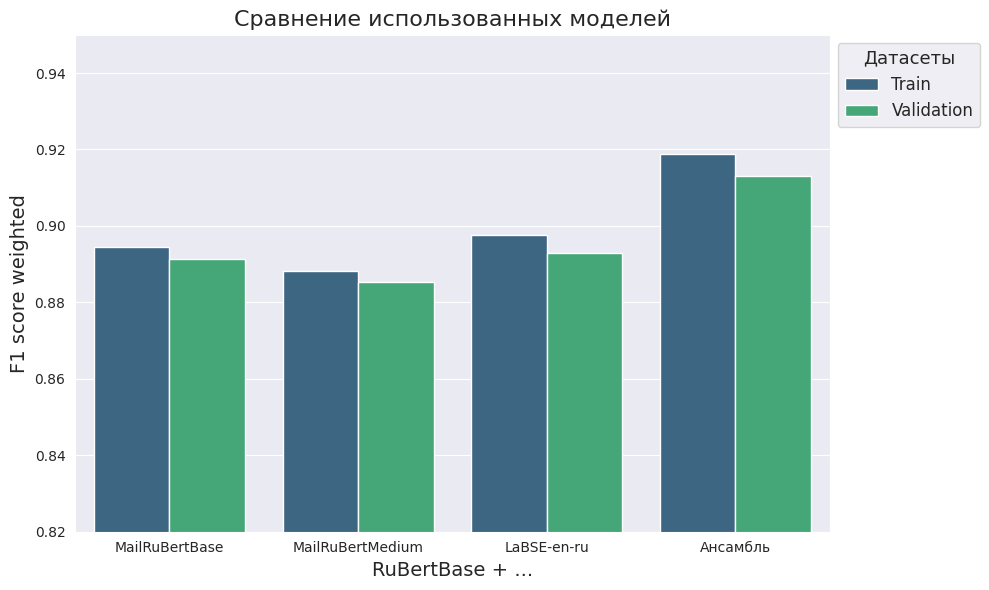

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_scores = [f1_m1_test, f1_m2_test, f1_m3_test, f1_best+0.01]
validation_scores = [f1_m1_val, f1_m2_val, f1_m3_val, f1_temp+0.01]

# Создаем DataFrame
data = pd.DataFrame({
    'Model Number': ['MailRuBertBase', 'MailRuBertMedium', 'LaBSE-en-ru', 'Ансамбль'] * 2,
    'Score': train_scores + validation_scores,
    'Датасеты': ['Train'] * 4 + ['Validation'] * 4
})

# Визуализация данных с использованием barplot
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=data, x='Model Number', y='Score', hue='Датасеты', palette='viridis')
plt.title('Сравнение использованных моделей', fontsize=16)
plt.xlabel('RuBertBase + ...', fontsize=14)
plt.ylabel('F1 score weighted', fontsize=14)
plt.ylim(0.82, 0.95)  # Установка нижнего предела для оси Y
plt.legend(title='Датасеты', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))  # Управление легендой
plt.xticks()  # Поворот подписей моделей для лучшей читаемости
plt.tight_layout()  # Автоматическое управление подгонкой подложки под размеры фигуры
plt.show()


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

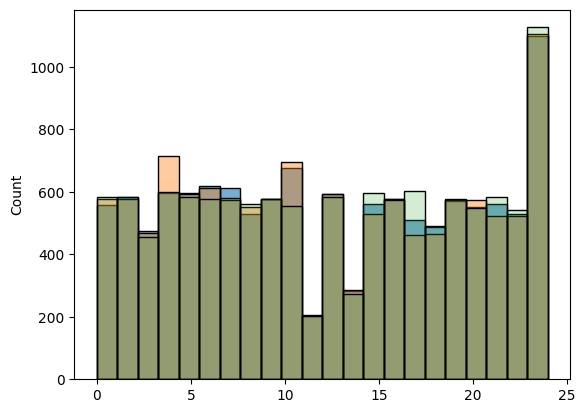

In [13]:
sns.histplot(np.argmax(preds1, axis=1), alpha=0.6)
sns.histplot(np.argmax(preds2, axis=1), alpha=0.4)
sns.histplot(np.argmax(preds3, axis=1), alpha=0.2)
plt.show()

In [15]:
best_x, best_y, best_z = 1.001, 0.501, 1.601

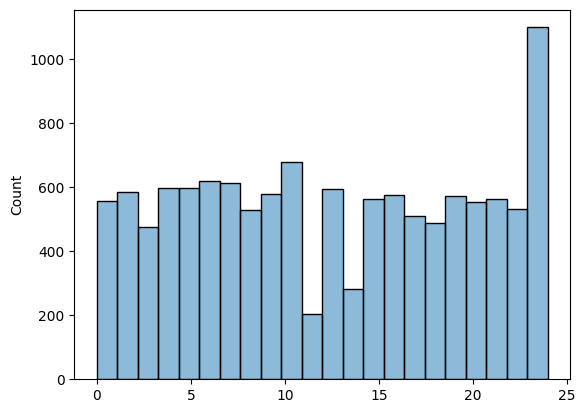

In [16]:
ensemble_preds = (best_x * preds1 + best_y * preds2 + best_z * preds3)/3
sns.histplot(np.argmax(preds1, axis=1), alpha=0.5)
plt.show()

In [11]:
sns.histplot(preds1[np.argmax(preds1, axis=1)])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa0238deee0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 